In [56]:
%matplotlib inline

import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (10.0, 10.0)

from  vectorizing_funcs import *
df = pd.read_csv('../all_data.csv', sep = '|', error_bad_lines=False, index_col=False, dtype='unicode')
df.head()

SubjectID    form_name feature_name feature_value feature_unit feature_delta
0       533  Demographic       Gender             F          NaN           0.0
1       533  Demographic          Age            65          NaN           0.0
2       533  Demographic         Race         White          NaN           0.0
3       533        ALSHX  onset_delta         -1023          NaN           0.0
4       533        ALSHX   diag_delta           -44          NaN           0.0

In [81]:
good_features = [
                'ALSFRS_Total', 'weight', 'Albumin', 'Creatinine',
            'bp_diastolic', 'bp_systolic', 'pulse', 'respiratory_rate', 'temperature',
            'mouth', 'respiratory', 'hands', 'fvc_percent'
            'BMI', 'Age', 'onset_delta',
            'family_ALS_hist', 'if_use_Riluzole',
'Albumin',
        'Alkaline Phosphatase',
        'ALPHA1-GLOBULIN',
        'ALPHA2-GLOBULIN',
        'ALT(SGPT)',
        'Amylase',
        'AST(SGOT)',
        'Bilirubin (Direct)',
        'Bilirubin (Indirect)',
        'Bilirubin (Total)',
        'Blood Urea Nitrogen (BUN)',
        'Calcium',
        'Chloride',
        'CK',
        'C-Reactive Protein',
        'Creatine Kinase MB',
        'Creatinine',
        'Erythrocyte Sediment',
        'Ferritin',
        'Fibrinogen',
        'Free T3',
        'Free T4',
        'Free Thyroxine Index',
        'GAMMA-GLOBULIN',
        'Gamma-glutamyltransferase',
        'Glucose',
        'HbA1c (Glycated Hemoglobin)',
        'HDL',
        'Hemoglobin',
        'Lactate Dehydrogenase',
        'LDL',
        'Lymphocytes',
        'Magnesium',
        'Mean Corpuscular Hemoglobin',
        'Mean Platelet Volume',
        'Monocytes',
        'Neutrophils',
        'Parathyroid Hormone',
        'Phosphorus',
        'Platelets',
        'Potassium',
        'Protein',
        'RBC Morphology: Spherocytes',
        'RBC Morphology: Target Cells',
        'RBC Morphology: Tear drop cells',
        'Sodium',
        'Thyroid Stimulating Hormone',
        'Total Cholesterol',
        'Total T4',
        'Triglycerides',
        'Uric Acid',
        'Urine Albumin',
        'Vitamin B12',
        'White Blood Cell (WBC)'
]

In [82]:
a = df[df.feature_name.isin(good_features)]
a.loc[:, 'subj_time'] = a.SubjectID + "_" + a.feature_delta.convert_objects(convert_numeric=True).astype(str)
a = a.drop_duplicates(subset = ['subj_time', 'feature_name'], take_last=True)
a.loc[:, 'feature_value'] = a.feature_value.convert_objects(convert_numeric=True)
p = a.pivot(index='subj_time', columns='feature_name', values='feature_value')
display(p.head())
print p.shape


feature_name  ALSFRS_Total  ALT(SGPT)  AST(SGOT)  Age  Albumin  \
subj_time                                                        
100256_0.0              26         28         24   53       43   
100256_10.0             22        NaN        NaN  NaN      NaN   
100256_100.0            24         29         23  NaN       38   
100256_189.0            18         35         25  NaN       42   
100256_23.0            NaN        NaN        NaN  NaN      NaN   

feature_name  Alkaline Phosphatase  Amylase  Bilirubin (Direct)  \
subj_time                                                         
100256_0.0                     103      NaN                 NaN   
100256_10.0                    NaN      NaN                 NaN   
100256_100.0                    98      NaN                 NaN   
100256_189.0                    89      NaN              1.7104   
100256_23.0                    NaN      NaN                 NaN   

feature_name  Bilirubin (Indirect)  Bilirubin (Total)   ...    \
subj_time                                               ...     
100256_0.0                     NaN             5.1312   ...     
100256_10.0                    NaN                NaN   ...     
100256_100.0                   NaN             6.8416   ...     
100256_189.0                   NaN            10.2624   ...     
100256_23.0                    NaN                NaN   ...     

feature_name  family_ALS_hist  hands  if_use_Riluzole  mouth  onset_delta  \
subj_time                                                                   
100256_0.0                NaN      5              NaN     12         -921   
100256_10.0               NaN      3              NaN     12          NaN   
100256_100.0              NaN      3              NaN     12          NaN   
100256_189.0              NaN      3              NaN     11          NaN   
100256_23.0               NaN    NaN              NaN    NaN          NaN   

feature_name  pulse  respiratory  respiratory_rate  temperature  weight  
subj_time                                                                
100256_0.0       72            3                12         35.9    77.3  
100256_10.0      82            4                12         37.1    77.3  
100256_100.0     82            4                12         36.8    70.9  
100256_189.0     82            3                14         36.2    71.4  
100256_23.0      80          NaN                12         36.1    71.0  

[5 rows x 62 columns]

(27137, 62)


In [40]:
distrib_per_col = a.groupby('feature_name')['feature_value'].agg(['mean', 'std'])
j = pd.merge(a, distrib_per_col, left_on='feature_name', right_index=True)
j.loc[:, 'critical'] = abs(j['mean']) + j['std']*3
outliers = j[abs(j.feature_value) > abs(j.critical)]

In [43]:
display(outliers.head())
outliers.to_csv('../outliers.txt', sep = '|', index=False)

SubjectID form_name feature_name  feature_value feature_unit  \
114171     67139     ALSHX  onset_delta          -2012          NaN   
274856    166455     ALSHX  onset_delta          -3119          NaN   
314128    193178     ALSHX  onset_delta          -2052          NaN   
403623    252256     ALSHX  onset_delta          -2171          NaN   
434251    276814     ALSHX  onset_delta          -2071          NaN   

       feature_delta   subj_time       mean         std     critical  
114171           0.0   67139_0.0 -693.46703  416.873261  1944.086812  
274856           0.0  166455_0.0 -693.46703  416.873261  1944.086812  
314128           0.0  193178_0.0 -693.46703  416.873261  1944.086812  
403623           0.0  252256_0.0 -693.46703  416.873261  1944.086812  
434251           0.0  276814_0.0 -693.46703  416.873261  1944.086812

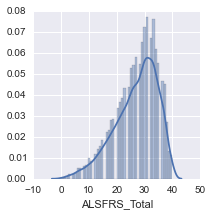

ALSFRS_Total median: 28.0 mad: 5.0


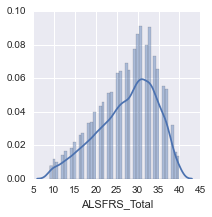

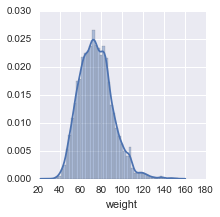

weight median: 74.0 mad: 10.6


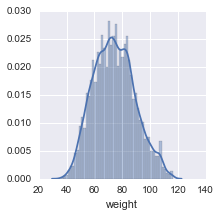

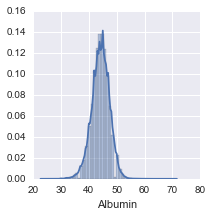

Albumin median: 44.0 mad: 2.0


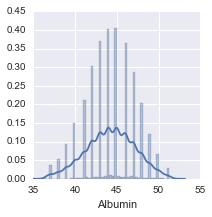

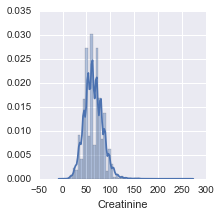

Creatinine median: 62.0 mad: 11.0


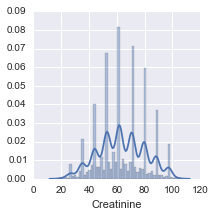

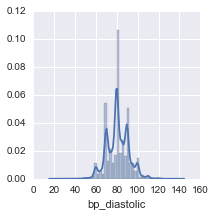

bp_diastolic median: 80.0 mad: 8.0


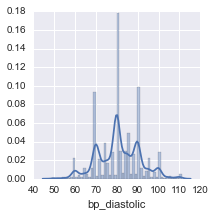

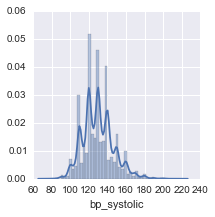

bp_systolic median: 130.0 mad: 10.0


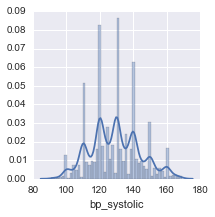

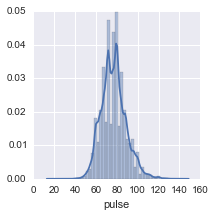

pulse median: 76.0 mad: 8.0


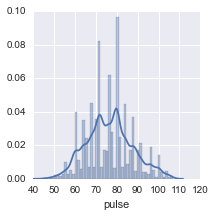

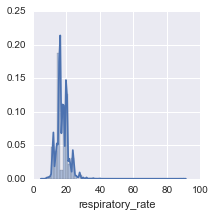

respiratory_rate median: 18.0 mad: 2.0


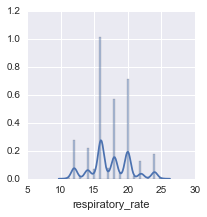

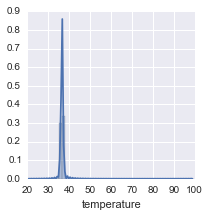

temperature median: 36.6 mad: 0.3


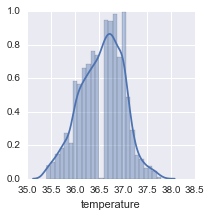

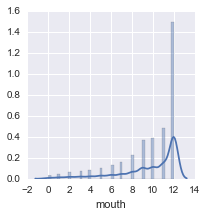

mouth median: 11.0 mad: 1.0


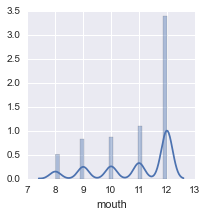

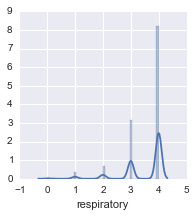

respiratory median: 4.0 mad: 0.0


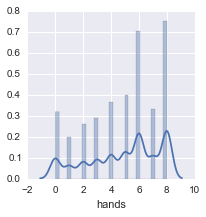

hands median: 5.0 mad: 2.0


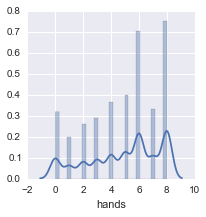

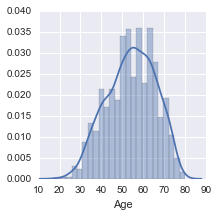

Age median: 55.0 mad: 8.0


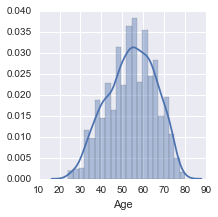

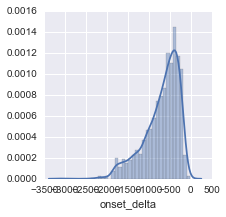

onset_delta median: -582.0 mad: 242.0


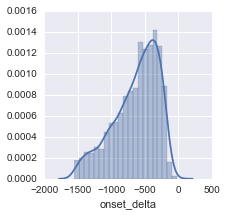

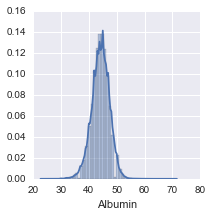

Albumin median: 44.0 mad: 2.0


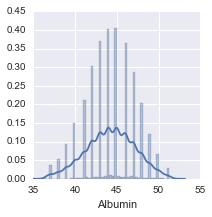

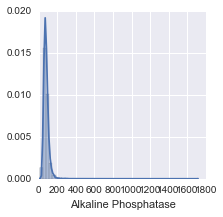

Alkaline Phosphatase median: 76.0 mad: 14.0


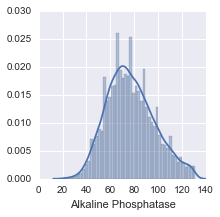

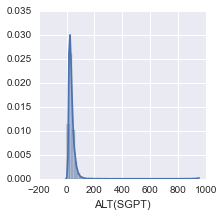

ALT(SGPT) median: 30.0 mad: 10.0


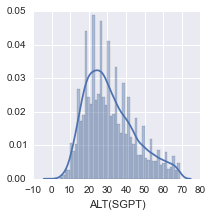

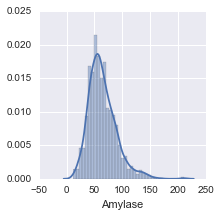

Amylase median: 60.0 mad: 15.0


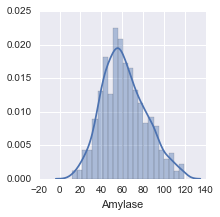

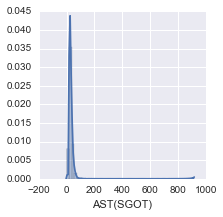

AST(SGOT) median: 28.0 mad: 7.0


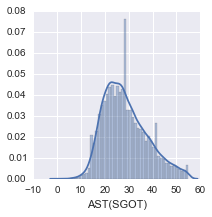

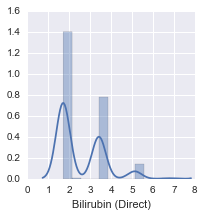

Bilirubin (Direct) median: 1.7104 mad: 0.0


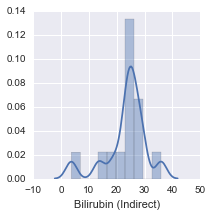

Bilirubin (Indirect) median: 24.8008 mad: 2.5656


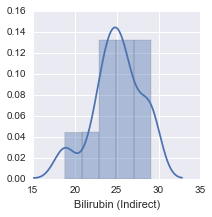

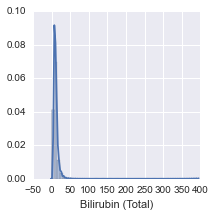

Bilirubin (Total) median: 10.0 mad: 3.1584


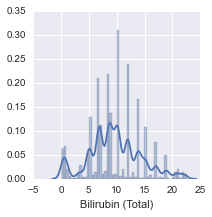

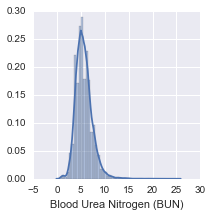

Blood Urea Nitrogen (BUN) median: 5.4765 mad: 1.0953


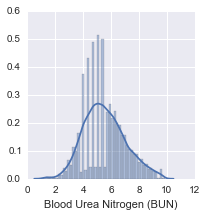

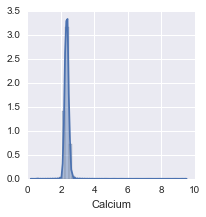

Calcium median: 2.3453 mad: 0.07485


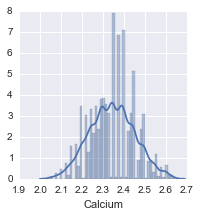

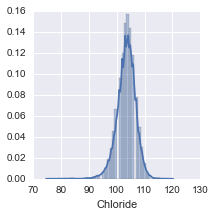

Chloride median: 104.0 mad: 2.0


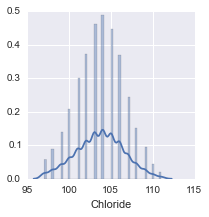

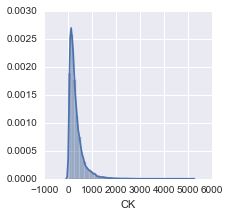

CK median: 229.0 mad: 122.0


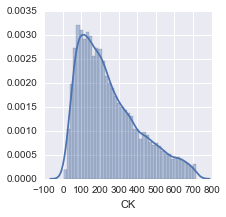

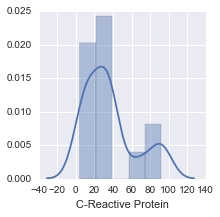

C-Reactive Protein median: 31.65 mad: 18.65


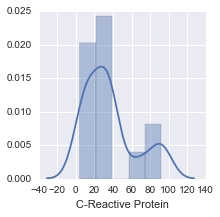

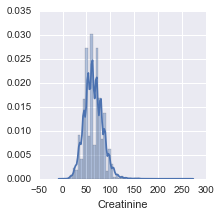

Creatinine median: 62.0 mad: 11.0


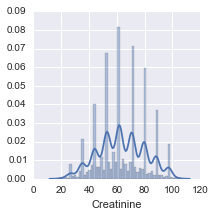

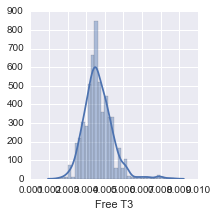

Free T3 median: 0.0046 mad: 0.0005


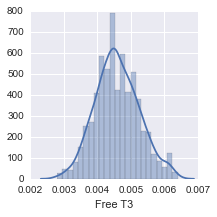

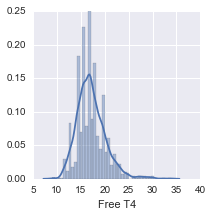

Free T4 median: 16.8 mad: 1.7


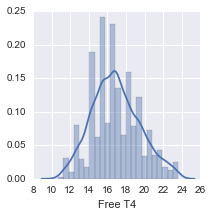

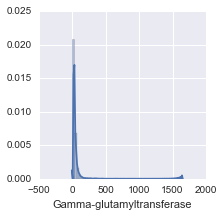

Gamma-glutamyltransferase median: 26.0 mad: 10.0


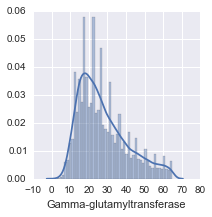

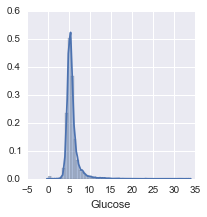

Glucose median: 5.3 mad: 0.527


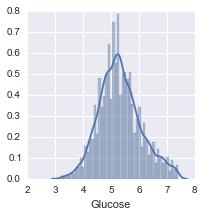

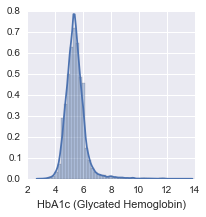

HbA1c (Glycated Hemoglobin) median: 5.4 mad: 0.4


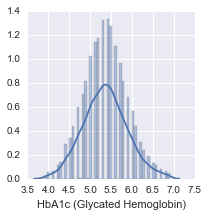

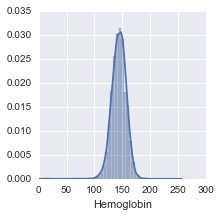

Hemoglobin median: 144.0 mad: 9.0


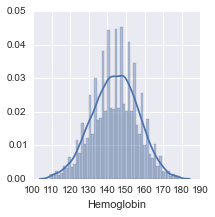

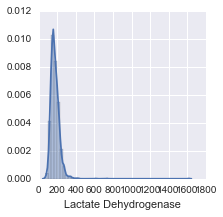

Lactate Dehydrogenase median: 169.0 mad: 26.0


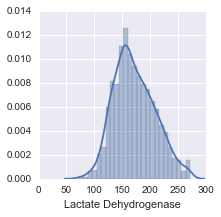

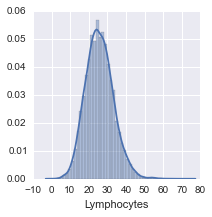

Lymphocytes median: 25.4 mad: 4.9


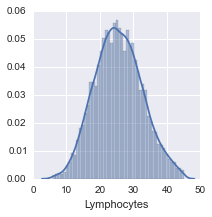

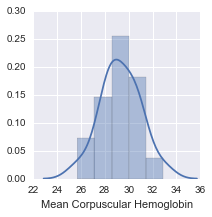

Mean Corpuscular Hemoglobin median: 29.1 mad: 1.1


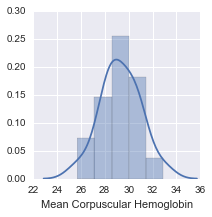

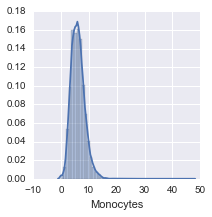

Monocytes median: 5.9 mad: 1.6


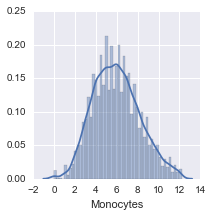

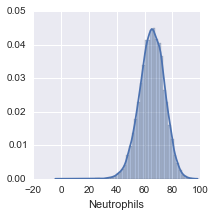

Neutrophils median: 65.4 mad: 6.0


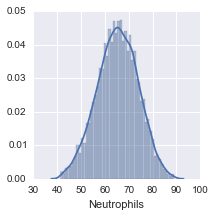

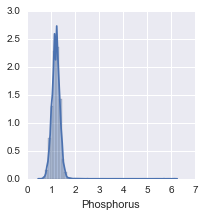

Phosphorus median: 1.1951 mad: 0.0969


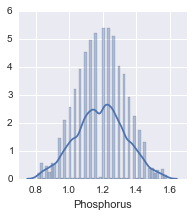

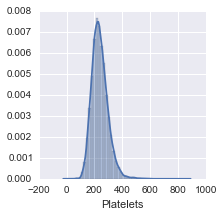

Platelets median: 233.0 mad: 36.0


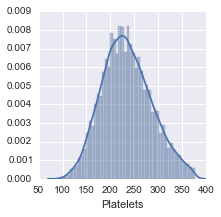

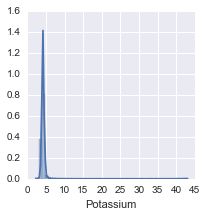

Potassium median: 4.2 mad: 0.2


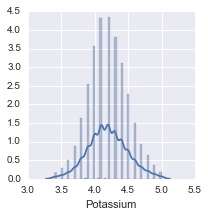

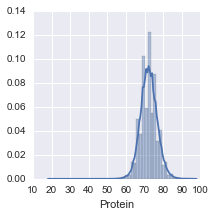

Protein median: 72.0 mad: 3.0


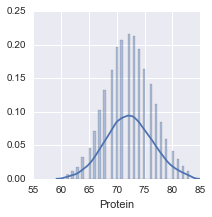

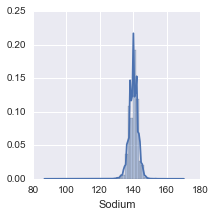

Sodium median: 140.0 mad: 2.0


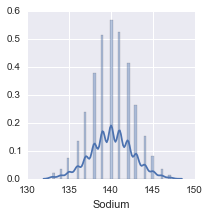

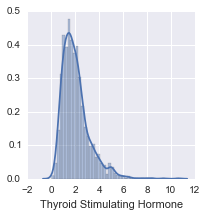

Thyroid Stimulating Hormone median: 1.81 mad: 0.63


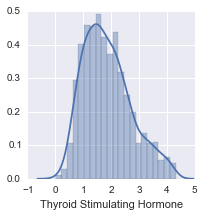

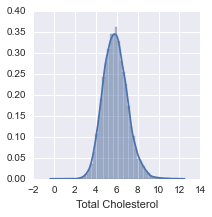

Total Cholesterol median: 5.8185 mad: 0.7758


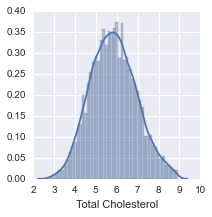

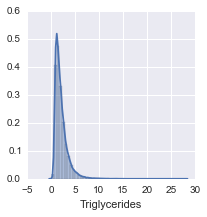

Triglycerides median: 1.68 mad: 0.6291


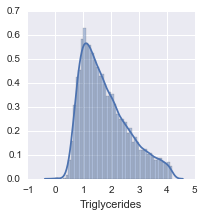

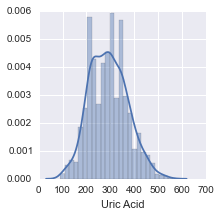

Uric Acid median: 290.0 mad: 60.0


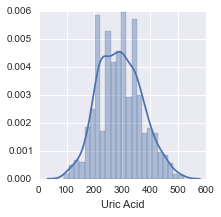

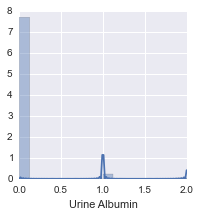

Urine Albumin median: 0.0 mad: 0.0


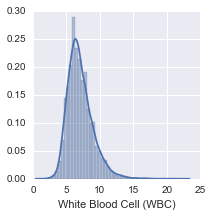

White Blood Cell (WBC) median: 6.8 mad: 1.1


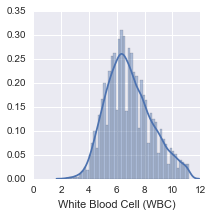

In [128]:
import scipy
for col in good_features:
    b = df[df.feature_name == col]
    b_num = b.feature_value.convert_objects(convert_numeric=True)
    if b_num.dtypes == np.float64 or b_num.dtypes == np.int64:
        b_num = b_num[~np.isnan(b_num)]
        if b_num.size > 10:
            sns.distplot(b_num, axlabel = col)
            plt.show()
            medi = np.median(b_num)
            mad = np.median(abs(b_num - medi))
            print col, "median:", medi, "mad:", mad
            if mad > 0.0:
                sns.distplot(b_num[abs(b_num-medi) < 4 * mad], axlabel = col)
                plt.show()
            
    


In [5]:
feature_names = df[["form_name", "feature_name"]].drop_duplicates()
feature_names.to_csv('../feature_names.csv', sep='|', index=False)

In [3]:
feature_values = df[["form_name", "feature_name", "feature_value"]].drop_duplicates()
feature_values = feature_values[np.isnan(feature_values.feature_value.convert_objects(convert_numeric=True))]
feature_values.to_csv('../feature_values.csv', sep='|', index=False)

In [5]:
feature_values = df[df.form_name == 'Lab Test']
feature_values = feature_values[~np.isnan(feature_values.feature_value.convert_objects(convert_numeric=True))]
by_subject = feature_values.groupby(["feature_name", "SubjectID"])
features_with_multiple_visits = by_subject.filter(lambda x: len(x)>2)
by_subject = features_with_multiple_visits.groupby("feature_name").SubjectID.nunique()
by_subject.sort(ascending=False)
by_subject[:30]


feature_name
Creatinine                   2391
Blood Urea Nitrogen (BUN)    2390
ALT(SGPT)                    2390
Sodium                       2390
AST(SGOT)                    2390
Potassium                    2390
Bilirubin (Total)            2385
Chloride                     2227
Hematocrit                   2202
Hemoglobin                   2202
Glucose                      2199
Albumin                      2105
Protein                      2105
Calcium                      2104
Alkaline Phosphatase         2104
Phosphorus                   2104
Platelets                    2103
Bicarbonate                  2041
White Blood Cell (WBC)       2019
Red Blood Cells (RBC)        2017
CK                           1942
Urine Ph                     1865
Total Cholesterol            1864
Absolute Basophil Count      1864
Gamma-glutamyltransferase    1864
Basophils                    1803
Monocytes                    1803
Lymphocytes                  1803
Absolute Eosinophil Count    1745
E

In [100]:
all_feature_metadata = invert_func_to_features(ts_funcs_to_features, "ts")
all_feature_metadata.update(invert_func_to_features(dummy_funcs_to_features, "dummy"))
all_feature_metadata = learn_to_dummies_model(df, all_feature_metadata)
vectorized, all_feature_metadata = vectorize(df, all_feature_metadata, debug=True)


family_ALS_hist
Hematocrit
Prothrombin Time (clotting)
weight
Sodium
Absolute Band Neutrophil Count
hands
Total Cholesterol
pulse
White Blood Cell (WBC)
Monocytes
Free T4
Lymphocytes
Albumin
Chloride
Neutrophils
ALSFRS_Total
Glucose
Alkaline Phosphatase
bp_systolic
Bicarbonate
Potassium
Urine Specific Gravity
bp_diastolic
Absolute Eosinophil Count
Red Blood Cells (RBC)
Blood Urea Nitrogen (BUN)
Phosphorus
CK
Eosinophils
fvc_percent
Absolute Neutrophil Count
Gender
Age
respiratory_rate
HbA1c (Glycated Hemoglobin)
Absolute Monocyte Count
Calcium
Urine Ph
mouth
Gamma-glutamyltransferase
Lactate Dehydrogenase
Basophils
onset_delta
Bilirubin (Total)
Creatinine
BMI
temperature
respiratory
AST(SGOT)
Hemoglobin
Absolute Lymphocyte Count
Platelets
Triglycerides
Race
if_use_Riluzole
Absolute Basophil Count
Protein
Uric Acid
ALT(SGPT)


In [101]:
vectorized.describe().transpose()

count        mean        std  \
family_ALS_hist_last                         375    0.210667   0.408327   
Hematocrit_last                             2212   39.442342  12.240731   
Hematocrit_mean_slope                       1873   -0.007893   0.132361   
Hematocrit_mean                             2212   39.357237  12.147535   
Hematocrit_pct_diff                         1873    0.000060   0.001476   
Prothrombin Time (clotting)_last             384   34.209635  36.901533   
Prothrombin Time (clotting)_mean_slope        76   -0.014852   0.130429   
Prothrombin Time (clotting)_mean             384   34.222179  36.891253   
Prothrombin Time (clotting)_pct_diff          76   -0.000522   0.006362   
weight_last                                 2424   75.956561  15.776150   
weight_mean_slope                           2228    0.004329   0.064417   
weight_mean                                 2424   75.952937  15.668093   
weight_pct_diff                             2228    0.000028   0.000571   
Sodium_last                                 2401  139.827947   2.664468   
Sodium_mean_slope                           2072   -0.027188   0.199695   
Sodium_mean                                 2401  139.942905   2.143624   
Sodium_pct_diff                             2072   -0.000037   0.000388   
Absolute Band Neutrophil Count_last          274    4.686934   3.637339   
Absolute Band Neutrophil Count_mean_slope     35   -0.038159   0.234212   
Absolute Band Neutrophil Count_mean          274    4.719599   3.699423   
Absolute Band Neutrophil Count_pct_diff        5   -0.008715   0.051796   
hands_last                                  2423    5.565415   2.246328   
hands_mean_slope                            2410   -0.004376   0.028102   
hands_mean                                  2423    5.721048   2.080245   
hands_pct_diff                              2364   -0.000978   0.006222   
Total Cholesterol_last                      1853    5.884443   1.113217   
Total Cholesterol_mean_slope                1656   -0.000046   0.031421   
Total Cholesterol_mean                      1853    5.889072   1.062297   
Total Cholesterol_pct_diff                  1656    0.000486   0.012159   
pulse_last                                  2176   75.974265  11.247816   
...                                          ...         ...        ...   
Platelets_mean_slope                        1758   -0.411089   2.033744   
Platelets_mean                              2096  239.774693  55.409355   
Platelets_pct_diff                          1758   -0.000273   0.002416   
Triglycerides_last                          1689    2.090100   1.421237   
Triglycerides_mean_slope                    1493    0.001522   0.056750   
Triglycerides_mean                          1689    2.089924   1.379139   
Triglycerides_pct_diff                      1493    0.003155   0.036731   
Asian                                       2424    0.008663   0.092692   
Black                                       2424    0.012789   0.112385   
Hispanic                                    2424    0.004125   0.064110   
Other                                       2424    0.003713   0.060833   
Unknown                                     2424    0.018977   0.136471   
White                                       2424    0.951733   0.214375   
if_use_Riluzole_last                        2060    0.655825   0.475214   
Absolute Basophil Count_last                1803    0.511976   1.435430   
Absolute Basophil Count_mean_slope          1607   -0.000066   0.004796   
Absolute Basophil Count_mean                1803    0.511936   1.432974   
Absolute Basophil Count_pct_diff            1223    0.003549   0.022276   
Protein_last                                2059   72.318893   4.296388   
Protein_mean_slope                          1732   -0.028873   0.391814   
Protein_mean                                2059   72.537488   3.917428   
Protein_pct_diff                            1732   -0.000084   0.001

In [30]:
slope = pd.read_csv('../all_slope.csv', sep = '|', index_col=0)
slope.index = slope.index.astype(str)

max_date = df[df.feature_name == 'ALSFRS_Total'][['SubjectID','feature_delta']]
max_date.loc[:, 'feature_delta'] = max_date.feature_delta.astype(int)
max_date = max_date.groupby('SubjectID').max()
print max_date.shape, slope.shape
j = slope.join(max_date)
print j.shape
j[j.feature_delta < 365].shape

(2424, 1) (2424, 1)
(2424, 2)


(219, 2)

In [33]:
df[df.feature_name == 'onset_site'].feature_value.unique()

array(['Bulbar', 'Limb', 'Limb and Bulbar'], dtype=object)

In [7]:
slope = pd.read_csv('../all_slope.csv', sep = '|', index_col=0)
filtered = pd.read_csv('../../ALSFRS_slope_PROACT_filtered.txt', sep = '|', index_col=0)
filtered.head()

ALSFRS_slope
SubjectID              
533           -0.965608
649           -0.921717
1234          -0.914787
2492          -0.598361
2956          -0.444039

In [8]:
slope.head()

ALSFRS_slope
SubjectID              
533           -0.965608
649           -0.921717
1234          -0.914787
2492          -0.598361
2956          -0.444039

In [19]:
j = pd.merge(filtered, slope, how='right', left_index = True, right_index = True)

In [22]:
j[np.isnan(j.ALSFRS_slope_x)].head()

ALSFRS_slope_x  ALSFRS_slope_y
SubjectID                                
11041                 NaN       -0.404208
15154                 NaN       -2.628601
85731                 NaN       -0.824859
87664                 NaN       -1.141923
112667                NaN        0.274024